<a href="https://colab.research.google.com/github/DrAlexSanz/nlpv2-course/blob/master/ANN_for_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's do text classification with a simple NN

In [85]:
!wget https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

--2022-08-26 09:51:39--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv.4’

bbc_text_cls.csv.4  100%[===================>]   4.85M  --.-KB/s    in 0.05s   

2022-08-26 09:51:39 (108 MB/s) - ‘bbc_text_cls.csv.4’ saved [5085081/5085081]



In [86]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

In [87]:
df = pd.read_csv("bbc_text_cls.csv")

In [88]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


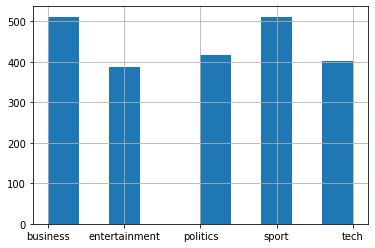

In [89]:
df["labels"].hist() # It's reasonably balanced

In [90]:
# map classes to integers (0 to k-1)

df["targets"] = df["labels"].astype("category").cat.codes # I expect 0 to 4 (5 classes)
df["targets"]

0       0
1       0
2       0
3       0
4       0
       ..
2220    4
2221    4
2222    4
2223    4
2224    4
Name: targets, Length: 2225, dtype: int8

In [91]:
df_train, df_test = train_test_split(df, test_size = 0.3)

In [92]:
tfidf = TfidfVectorizer(stop_words = "english")
x_train = tfidf.fit_transform(df_train["text"])
x_test = tfidf.transform(df_test["text"])

In [93]:
y_train = df_train["targets"]
y_test = df_test["targets"]

In [94]:
n_classes = df["targets"].max() + 1
n_classes # Check that it's 5

5

In [95]:
# See how many dimensions I have in my data (dim in x, after the tfidf vectorizer)

D = x_train.shape[1]
D

25238

In [96]:
# Build model

n_1 = 300 # first hidden layer
n_2 = 300 # second hidden layer
n_3= 30 # third hidden layer. And then we relax

i = Input(shape = (D,))
x = Dense(n_1, activation = "elu")(i)
x = Dense(n_2, activation = "elu")(x)
x = Dense(n_3, activation = "elu")(x)
x = Dense(n_classes)(x) # Softmax is in the loss

model = Model(i, x)


In [97]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 25238)]           0         
                                                                 
 dense_20 (Dense)            (None, 300)               7571700   
                                                                 
 dense_21 (Dense)            (None, 300)               90300     
                                                                 
 dense_22 (Dense)            (None, 30)                9030      
                                                                 
 dense_23 (Dense)            (None, 5)                 155       
                                                                 
Total params: 7,671,185
Trainable params: 7,671,185
Non-trainable params: 0
_________________________________________________________________


In [98]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), optimizer = "adam", metrics = ["accuracy"])

In [99]:
# Make data an array, not a df

x_train = x_train.toarray()
x_test = x_test.toarray()

In [100]:
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 7, batch_size = 128)

Epoch 1/7
13/13 [==============================] - 1s 33ms/step - loss: 1.1508 - accuracy: 0.8099 - val_loss: 0.4112 - val_accuracy: 0.9596
Epoch 2/7
13/13 [==============================] - 0s 16ms/step - loss: 0.1284 - accuracy: 0.9961 - val_loss: 0.1039 - val_accuracy: 0.9746
Epoch 3/7
13/13 [==============================] - 0s 15ms/step - loss: 0.0103 - accuracy: 0.9994 - val_loss: 0.0854 - val_accuracy: 0.9760
Epoch 4/7
13/13 [==============================] - 0s 17ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0855 - val_accuracy: 0.9731
Epoch 5/7
13/13 [==============================] - 0s 16ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0842 - val_accuracy: 0.9716
Epoch 6/7
13/13 [==============================] - 0s 15ms/step - loss: 7.6255e-04 - accuracy: 1.0000 - val_loss: 0.0833 - val_accuracy: 0.9731
Epoch 7/7
13/13 [==============================] - 0s 15ms/step - loss: 5.9104e-04 - accuracy: 1.0000 - val_loss: 0.0829 - val_accuracy: 0.9731


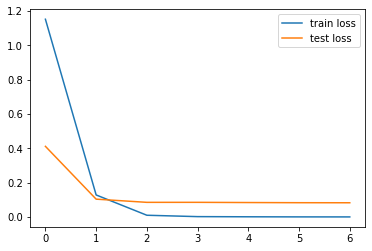

In [101]:
# See the loss and accuracy evolution

plt.plot(r.history["loss"], label = "train loss")
plt.plot(r.history["val_loss"], label = "test loss")
plt.legend()

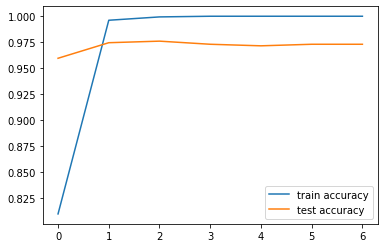

In [102]:
plt.plot(r.history["accuracy"], label = "train accuracy")
plt.plot(r.history["val_accuracy"], label = "test accuracy")
plt.legend()

Looks fine, test loss is worse than train loss and accuracy is worse too.